Group 33: Breitenecker Johannes, Dasovic Ivana, Thurner Lukas
    
# Exercise n°1: Classification

## Review dataset

For this exercise we will try to predict who wrote the review.

## Data preprocessing


### Import libraries 


In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
import sklearn as sk

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn import metrics
import time
from scipy.stats import randint 
from sklearn.feature_selection import VarianceThreshold


### Import datasets

In [149]:
amazon_review_train_data = pd.read_csv("amazon_review_ID.shuf.lrn.csv")
amazon_review_test_data = pd.read_csv("amazon_review_ID.shuf.tes.csv")

In [150]:
amazon_review_train_data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,14,9,8,12,7,4,5,3,2,...,0,1,0,1,0,1,1,0,0,Grove
1,1,12,3,8,6,5,3,2,3,2,...,0,0,0,0,0,0,0,0,0,Chell
2,2,17,5,7,12,8,3,0,3,2,...,0,1,0,0,0,0,1,0,0,Auken
3,3,9,6,10,6,4,7,7,3,3,...,0,0,0,0,2,0,0,0,0,Davisson
4,4,8,4,5,5,1,7,0,0,0,...,0,0,3,0,0,0,0,0,0,Vision


In [151]:
num_rows, num_cols = amazon_review_train_data.shape
print(f'Number of columns is {num_cols} and number of row is {num_rows}')

Number of columns is 10002 and number of row is 750


In [152]:
column_names = ''
for col in amazon_review_train_data.columns:
    column_names += col + ', '
print(f' columns are: {column_names[:-2]}')

 columns are: ID, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45, V46, V47, V48, V49, V50, V51, V52, V53, V54, V55, V56, V57, V58, V59, V60, V61, V62, V63, V64, V65, V66, V67, V68, V69, V70, V71, V72, V73, V74, V75, V76, V77, V78, V79, V80, V81, V82, V83, V84, V85, V86, V87, V88, V89, V90, V91, V92, V93, V94, V95, V96, V97, V98, V99, V100, V101, V102, V103, V104, V105, V106, V107, V108, V109, V110, V111, V112, V113, V114, V115, V116, V117, V118, V119, V120, V121, V122, V123, V124, V125, V126, V127, V128, V129, V130, V131, V132, V133, V134, V135, V136, V137, V138, V139, V140, V141, V142, V143, V144, V145, V146, V147, V148, V149, V150, V151, V152, V153, V154, V155, V156, V157, V158, V159, V160, V161, V162, V163, V164, V165, V166, V167, V168, V169, V170, V171, V172, V173, V174, V175, V176, V177, V178, V179, V180, V181, V182

### Missing Values


In [153]:
missing_values_count = amazon_review_train_data.isnull().sum()

print(missing_values_count)

ID        0
V1        0
V2        0
V3        0
V4        0
         ..
V9997     0
V9998     0
V9999     0
V10000    0
Class     0
Length: 10002, dtype: int64


In [154]:
print(amazon_review_train_data.isnull().sum().sum())

0


As it is visible from the last output, there are no missing values in this dataset

### Deleting columns not relevant for classification

The 'ID' column is not relevant for the classification and it shouldn't effect the output

In [155]:
amazon_review_train_data = amazon_review_train_data.drop('ID', axis = 'columns')
amazon_review_train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,14,9,8,12,7,4,5,3,2,2,...,0,1,0,1,0,1,1,0,0,Grove
1,12,3,8,6,5,3,2,3,2,0,...,0,0,0,0,0,0,0,0,0,Chell
2,17,5,7,12,8,3,0,3,2,3,...,0,1,0,0,0,0,1,0,0,Auken
3,9,6,10,6,4,7,7,3,3,3,...,0,0,0,0,2,0,0,0,0,Davisson
4,8,4,5,5,1,7,0,0,0,0,...,0,0,3,0,0,0,0,0,0,Vision


In [156]:
X = amazon_review_train_data.drop('Class', axis=1)
y = amazon_review_train_data['Class']

In [157]:
feature_selection = VarianceThreshold(threshold=(0.4))
X_new = feature_selection.fit_transform(X)
mask = feature_selection.get_support()

X = pd.DataFrame(data=X_new, columns=X.columns[mask])

### Scaling the data

In [158]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

X_df = pd.DataFrame(X_new, columns=X.columns)
X_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9945,V9948,V9950,V9953,V9973,V9979,V9980,V9984,V9985,V9989
0,0.342613,0.346060,0.369581,1.347625,0.250521,-0.232510,0.289629,-0.312687,-0.421802,-0.311276,...,-0.255906,4.184334,4.184334,-0.332318,-0.302707,-0.305441,-0.309652,1.91977,-0.309214,-0.321691
1,-0.007230,-1.282883,0.369581,-0.182608,-0.354602,-0.571118,-0.457693,-0.312687,-0.421802,-1.075456,...,-0.255906,-0.303155,-0.303155,1.178217,1.056754,-0.305441,-0.309652,-0.25684,-0.309214,-0.321691
2,0.867379,-0.739902,0.073758,1.347625,0.553083,-0.571118,-0.955908,-0.312687,-0.421802,0.070814,...,2.719740,-0.303155,-0.303155,2.688752,-0.302707,-0.305441,-0.309652,-0.25684,-0.309214,-0.321691
3,-0.531995,-0.468411,0.961225,-0.182608,-0.657164,0.783312,0.787844,-0.312687,0.054631,0.070814,...,-0.255906,-0.303155,-0.303155,-0.332318,-0.302707,-0.305441,-0.309652,-0.25684,-0.309214,-0.321691
4,-0.706917,-1.011392,-0.517886,-0.437647,-1.564850,0.783312,-0.955908,-1.560110,-1.374667,-1.075456,...,-0.255906,-0.303155,-0.303155,-0.332318,1.056754,-0.305441,-0.309652,-0.25684,-0.309214,-0.321691


In [159]:
best_models = {}

### Splitting dataset to train and test data

In [160]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3)

## Classifier n°1: decision tree

In [161]:
decision_tree = tree.DecisionTreeClassifier()
parameters = {'criterion': ['entropy', 'gini'],
                'splitter': ['best', 'random'],
                'max_depth': randint(1, 150),
                'min_samples_split':  randint(2, 1000)}

#### Finding the best decision tree

In [162]:
best_decision_tree = sk.model_selection.RandomizedSearchCV(estimator = decision_tree, param_distributions = parameters, cv = 2, n_iter = 500)
best_decision_tree.fit(X_train, y_train)

print("Random Search CV results" )
print("\n The best estimator:\n", best_decision_tree.best_estimator_)
print("\n The best score:\n", best_decision_tree.best_score_)
print("\n The best parameters:\n")
for param, value in best_decision_tree.best_params_.items():
    print("\t ", param, ": ", value)
print("\n The best cross validation strategy:\n", best_decision_tree.cv)

Random Search CV results

 The best estimator:
 DecisionTreeClassifier(max_depth=69, min_samples_split=19, splitter='random')

 The best score:
 0.18093489681595215

 The best parameters:

	  criterion :  gini
	  max_depth :  69
	  min_samples_split :  19
	  splitter :  random

 The best cross validation strategy:
 2


In [163]:
start_time = time.time()
best_dt_model = best_decision_tree.best_estimator_
best_dt_model = best_dt_model.fit(X_train,y_train)  
best_dt_prediction = best_dt_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['decision_tree'] = best_dt_model

--- runtime --- 0.12729167938232422


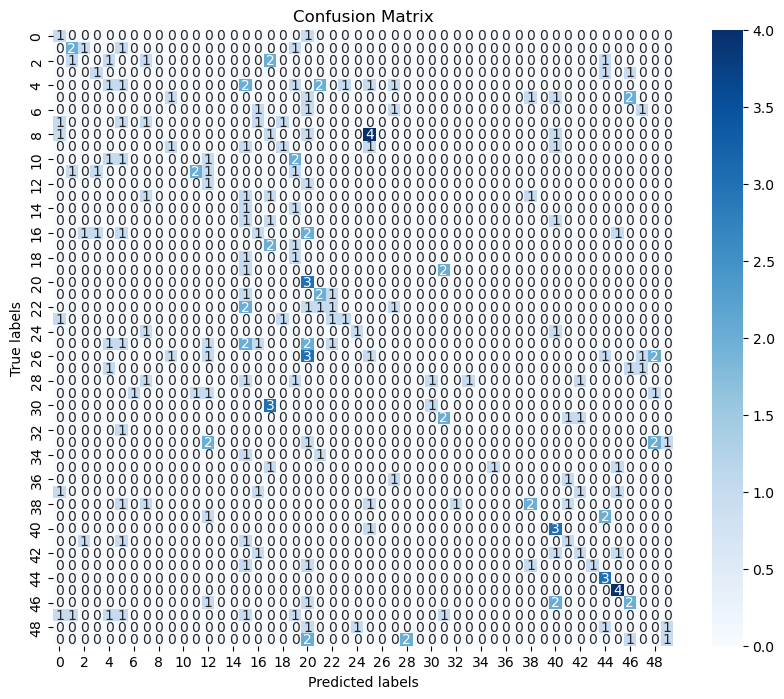

accuracy: 0.19555555555555557
precision: 0.19345069745069746
recall: 0.19555555555555557
F1: 0.16743467890134558


C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross validated scores: [0.21904762 0.24761905 0.22857143 0.22857143 0.16190476]


In [164]:
best_dt_cm = metrics.confusion_matrix(y_test, best_dt_prediction)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(best_dt_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_dt_prediction))
print("precision:",metrics.precision_score(y_test,best_dt_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_dt_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_dt_prediction, average='weighted'))

cv_scores = cross_val_score(best_dt_model,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

[Text(0.754247572815534, 0.9772727272727273, 'X[2231] <= 2.974\ngini = 0.979\nsamples = 525\nvalue = [11, 9, 11, 9, 7, 10, 8, 12, 13, 14, 9, 8, 12\n6, 10, 12, 12, 8, 13, 8, 13, 13, 11, 10, 8, 8\n8, 12, 11, 9, 10, 11, 8, 6, 11, 12, 9, 13, 13\n11, 14, 10, 8, 11, 15, 10, 12, 5, 17, 14]'),
 Text(0.7348300970873787, 0.9318181818181818, 'X[1602] <= 0.463\ngini = 0.979\nsamples = 510\nvalue = [11, 8, 11, 9, 7, 10, 7, 12, 13, 13, 9, 8, 12\n6, 10, 12, 12, 8, 4, 8, 13, 13, 11, 10, 8, 7\n8, 12, 11, 9, 10, 10, 8, 6, 11, 12, 9, 13, 12\n11, 14, 10, 8, 11, 15, 10, 12, 5, 17, 14]'),
 Text(0.537621359223301, 0.8863636363636364, 'X[482] <= 1.097\ngini = 0.976\nsamples = 413\nvalue = [9, 8, 8, 9, 3, 10, 7, 3, 5, 12, 9, 8, 12, 1\n8, 8, 12, 4, 2, 8, 13, 5, 2, 9, 7, 3, 5, 12\n10, 9, 10, 8, 7, 6, 6, 12, 9, 13, 4, 11, 14\n9, 8, 3, 15, 10, 12, 4, 17, 14]'),
 Text(0.4368932038834951, 0.8409090909090909, 'X[1519] <= 3.734\ngini = 0.969\nsamples = 239\nvalue = [7, 8, 8, 8, 2, 6, 1, 1, 3, 12, 6, 6, 8, 0\n8, 6, 2, 

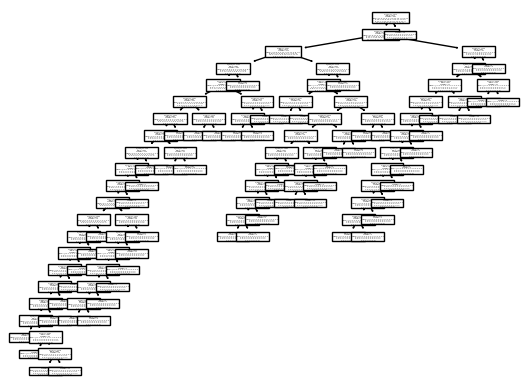

In [165]:
tree.plot_tree(best_dt_model)

## Classifier n°2: random forest

In [166]:
random_forest = RandomForestClassifier()
parameters = {'criterion': ['entropy', 'gini'],
                'max_depth': randint(1, 150),
                'min_samples_split':  randint(2, 1000),
                'max_features': ['sqrt', 'log2', None]}

#### Finding the best random forest

In [167]:
best_random_forest = sk.model_selection.RandomizedSearchCV(estimator=random_forest, param_distributions = parameters,cv = 2, n_iter = 500, n_jobs=-1)
best_random_forest.fit(X_train, y_train)

print("Random Search CV results" )
print("\n The best estimator:\n", best_random_forest.best_estimator_)
print("\n The best score:\n", best_random_forest.best_score_)
print("\n The best parameters:\n")
for param, value in best_random_forest.best_params_.items():
    print("\t ", param, ": ", value)
print("\n The best cross validation strategy:\n", best_random_forest.cv)

Random Search CV results

 The best estimator:
 RandomForestClassifier(criterion='entropy', max_depth=52, max_features=None,
                       min_samples_split=18)

 The best score:
 0.33138623632194586

 The best parameters:

	  criterion :  entropy
	  max_depth :  52
	  max_features :  None
	  min_samples_split :  18

 The best cross validation strategy:
 2


In [168]:
start_time = time.time()
best_rf_model = best_random_forest.best_estimator_
best_rf_model = best_rf_model.fit(X_train,y_train)  
best_rf_prediction = best_rf_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['random_forest'] = best_rf_model

--- runtime --- 15.762018203735352


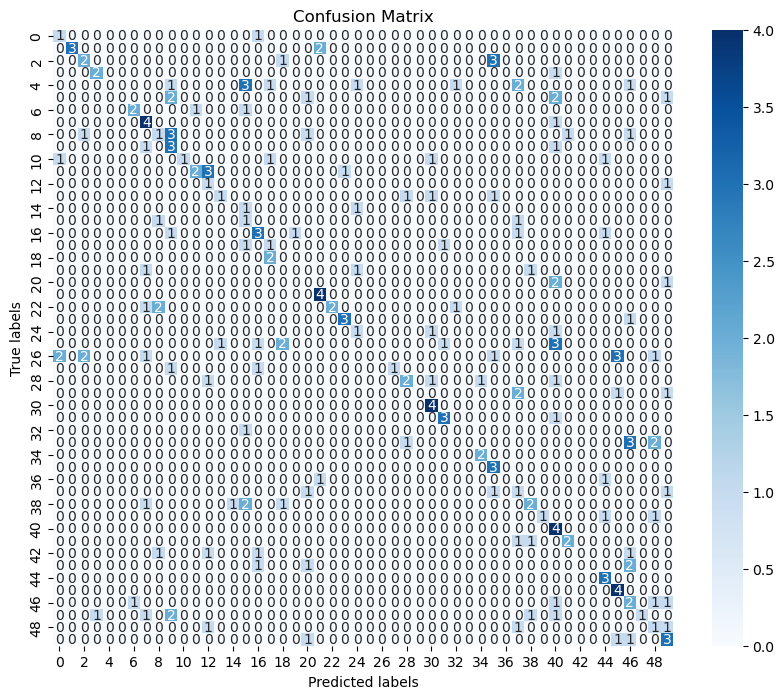

accuracy: 0.3422222222222222
precision: 0.3561742461567023
recall: 0.3422222222222222
F1: 0.2984318697941886


C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross validated scores: [0.37142857 0.4        0.34285714 0.43809524 0.4       ]


In [169]:
best_rf_cm = metrics.confusion_matrix(y_test, best_rf_prediction)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(best_rf_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_rf_prediction))
print("precision:",metrics.precision_score(y_test,best_rf_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_rf_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_rf_prediction, average='weighted'))

cv_scores = cross_val_score(best_rf_model,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

## Classifier n°3: KNN


In [170]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': randint(1,50),
              'weights': ['uniform', 'distance'],
              'algorithm': ['brute']
}

#### Finding the best KNN

In [171]:
best_KNN = sk.model_selection.RandomizedSearchCV(estimator=knn, param_distributions = parameters, cv = 2, n_iter = 500, n_jobs=-1)
best_KNN.fit(X_train, y_train)

print(" Results from Random Search CV" )
print("\n The best estimator:\n", best_KNN.best_estimator_)
print("\n The best score:\n", best_KNN.best_score_)
print("\n The best parameters:\n")
for param, value in best_KNN.best_params_.items():
    print("\t ", param, ": ", value)
print("\n The best cross validation strategy:\n", best_KNN.cv)


 Results from Random Search CV

 The best estimator:
 KNeighborsClassifier(algorithm='brute', n_neighbors=10, weights='distance')

 The best score:
 0.21143296665021916

 The best parameters:

	  algorithm :  brute
	  n_neighbors :  10
	  weights :  distance

 The best cross validation strategy:
 2


In [172]:
start_time = time.time()
best_knn_model = best_KNN.best_estimator_
best_knn_model = best_knn_model.fit(X_train,y_train)  
best_knn_prediction = best_knn_model.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
best_models['knn'] = best_knn_model

--- runtime --- 0.03951382637023926


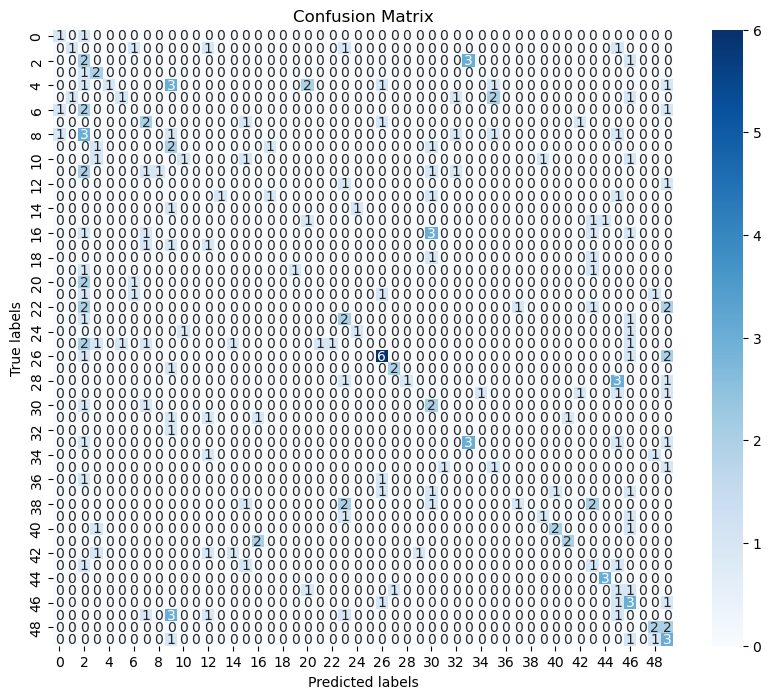

accuracy: 0.22666666666666666
precision: 0.2768958775429364
recall: 0.22666666666666666
F1: 0.20198314943242482
Cross validated scores: [0.25714286 0.25714286 0.2        0.25714286 0.23809524]


C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
best_knn_cm = metrics.confusion_matrix(y_test, best_knn_prediction)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(best_knn_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("accuracy:",metrics.accuracy_score(y_test,best_knn_prediction))
print("precision:",metrics.precision_score(y_test,best_knn_prediction, average='weighted'))
print("recall:",metrics.recall_score(y_test,best_knn_prediction, average='weighted'))
print("F1:",metrics.f1_score(y_test,best_knn_prediction, average='weighted'))

cv_scores = cross_val_score(best_knn_model,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

## Evaluation

In [174]:
def eval_function(y_test, best_prediction):
    print("accuracy:",metrics.accuracy_score(y_test,best_prediction))
    print("precision:",metrics.precision_score(y_test,best_prediction, average='weighted'))
    print("recall:",metrics.recall_score(y_test,best_prediction, average='weighted'))
    print("F1:",metrics.f1_score(y_test,best_prediction, average='weighted'))


In [175]:
best_prediction_dict = {}
for name, best_model in best_models.items():
    best_prediction_dict[name] = best_model.predict(X_test)


In [176]:
for name, best_prediction in best_prediction_dict.items():
    print(f'\t {name} ')
    eval_function(y_test, best_prediction)
    print('\n')

	 decision_tree 
accuracy: 0.19555555555555557
precision: 0.19345069745069746
recall: 0.19555555555555557
F1: 0.16743467890134558


	 random_forest 
accuracy: 0.3422222222222222
precision: 0.3561742461567023
recall: 0.3422222222222222
F1: 0.2984318697941886


	 knn 
accuracy: 0.22666666666666666
precision: 0.2768958775429364
recall: 0.22666666666666666
F1: 0.20198314943242482




C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Kaggle competition

In [177]:
amazon_review_test_data.shape

(750, 10001)

In [178]:
amazon_review_test_data_ID = amazon_review_test_data.ID
amazon_review_test_data = amazon_review_test_data.drop(['ID'], axis='columns') 

In [179]:
feature_selection.transform(amazon_review_test_data)
selected_columns = X_train.columns
X_test_selected = pd.DataFrame(data=amazon_review_test_data, columns=selected_columns)
X_test_selected.shape

(750, 2586)

In [180]:
X_test_selected = StandardScaler().fit_transform(X_test_selected)

X_test_selected = pd.DataFrame(data=X_test_selected)
X_test_selected

,0,1,2,3,4,5,6,7,8,9,...,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585
0,0.086788,0.226780,0.685946,0.963385,0.813907,-0.202102,-0.961746,-0.188572,-0.458232,-0.672316,...,-0.251783,1.324936,1.324936,1.189853,-0.264907,-0.295876,-0.259880,-0.30007,-0.267261,-0.347438
1,-0.812259,-0.356702,-1.400507,-0.354155,-1.520434,0.883173,1.241099,0.687151,0.485927,2.937109,...,-0.251783,-0.356455,-0.356455,-0.287613,-0.264907,-0.295876,-0.259880,-0.30007,-0.267261,-0.347438
2,-0.452640,-0.064961,-1.102442,0.172861,-0.353264,-0.563861,-0.716985,-0.626434,0.958007,-0.672316,...,-0.251783,-0.356455,-0.356455,-0.287613,-0.264907,-0.295876,-0.259880,-0.30007,-0.267261,-0.347438
3,-0.812259,-0.064961,-0.208248,-0.090647,-0.353264,-0.925619,2.464902,-1.502158,2.846325,1.854282,...,-0.251783,-0.356455,-0.356455,1.189853,-0.264907,-0.295876,-0.259880,-0.30007,-0.267261,-0.347438
4,2.604118,1.685487,1.282076,2.280925,-0.061471,-0.202102,-0.227464,0.687151,0.485927,-0.672316,...,-0.251783,1.324936,1.324936,-0.287613,-0.264907,1.372600,-0.259880,-0.30007,4.743887,-0.347438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.446407,-0.648444,-0.804377,1.226893,0.230322,-0.202102,-0.472225,-0.188572,-0.458232,-1.033258,...,-0.251783,-0.356455,-0.356455,-0.287613,-0.264907,-0.295876,-0.259880,-0.30007,1.403122,-0.347438
746,0.266597,1.685487,-0.208248,-0.881170,1.689285,0.159656,0.017296,-0.626434,0.485927,2.576167,...,-0.251783,-0.356455,-0.356455,-0.287613,-0.264907,-0.295876,1.122461,-0.30007,-0.267261,-0.347438
747,0.086788,0.518522,-1.400507,-0.617663,-1.228642,-0.202102,-0.472225,2.000737,0.958007,-0.672316,...,-0.251783,-0.356455,-0.356455,-0.287613,-0.264907,-0.295876,-0.259880,-0.30007,-0.267261,-0.347438
748,-0.812259,-0.648444,-0.804377,0.172861,1.105700,-0.925619,-0.716985,-1.502158,-1.402391,-0.311373,...,-0.251783,-0.356455,-0.356455,-0.287613,-0.264907,-0.295876,-0.259880,-0.30007,1.403122,-0.347438


In [181]:
model = best_models.get('random_forest')
predictions = model.predict(X_test_selected)

print('Random forest model:')
print("Max depth:", model.max_depth)
print("Max features:", model.max_features)
print("Min samples split:", model.min_samples_split)

Random forest model:
Max depth: 52
Max features: None
Min samples split: 18


C:\Users\IvanaD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [182]:
print('ID,"class"')
for i in range(len(predictions)):
    print(f'{amazon_review_test_data_ID[i]}, {predictions[i]}')

ID,"class"
750, Chachra
751, Chachra
752, Chachra
753, Chachra
754, Chachra
755, Chachra
756, Chachra
757, Chachra
758, Chachra
759, Chachra
760, Chachra
761, Chachra
762, McKee
763, Chachra
764, Chachra
765, Chachra
766, Chachra
767, Chachra
768, Chachra
769, Chachra
770, Chachra
771, Chachra
772, Chachra
773, Chachra
774, Chachra
775, Chachra
776, Chachra
777, Chachra
778, Chachra
779, Chachra
780, Chachra
781, Chachra
782, McKee
783, Chachra
784, Chachra
785, Chachra
786, Chachra
787, Chachra
788, Chachra
789, Chachra
790, Chachra
791, Chachra
792, Chachra
793, Chachra
794, Chachra
795, Chachra
796, Chachra
797, Chachra
798, Cutey
799, Chachra
800, Chachra
801, Chachra
802, Chachra
803, Chachra
804, Chachra
805, Chachra
806, Chachra
807, Chachra
808, Chachra
809, Chachra
810, Chachra
811, Chachra
812, Chachra
813, Grove
814, Chachra
815, Chachra
816, Chachra
817, McKee
818, Chachra
819, Chachra
820, Chachra
821, Chachra
822, Chachra
823, Chachra
824, Chachra
825, Chachra
826, Chachr